In [18]:
import pandas as pd
import Utils
import Preprocess
import RetrievalMethods

## Read Data - Preprocessing - Statistics Extraction

In [19]:
passage_collection_file = '../dataset/passage_collection_new.txt'
test_queries_file = '../dataset/test-queries.tsv'
candidate_passages_top1000_file = '../dataset/candidate_passages_top1000.tsv'

In [20]:
passage_collection = Utils.read_collection(passage_collection_file)

In [21]:
### preprocess the passage sentences
preprocessed_passages = Preprocess.process_data(passage_collection,lemm = False)

In [22]:
print(preprocessed_passages[0:3])

[['this', 'is', 'the', 'definition', 'of', 'rna', 'along', 'with', 'examples', 'of', 'types', 'of', 'rna', 'this', 'is', 'the', 'definition', 'of', 'rna', 'along', 'with', 'examples', 'of', 'types', 'of', 'rna', 'rna', 'definition'], ['best', 'the', 'ar', 'designation', 'comes', 'from', 'the', 'name', 'of', 'the', 'company', 'that', 'produced', 'the', 'firearm', 'it', 'is', 'a', 'common', 'misconception', 'that', 'it', 'stands', 'for', 'assault', 'from', 'the', 'is', 'based', 'on', 'the', 'designed', 'by', 'eugene', 'stoner', 'of', 'the', 'fairchild', 'armalite'], ['what', 'does', 'ar', 'really', 'posted', 'by', 'quality', 'ar', 'barrels', 'jul', 'ar', 'articles', 'over', 'the', 'years', 'the', 'media', 'has', 'programmed', 'the', 'public', 'into', 'thinking', 'that', 'ar', 'stands', 'for', 'assault', 'this', 'is', 'not', 'the', 'to', 'follow', 'is', 'a', 'short', 'history', 'and', 'overview', 'of', 'the', 'armalite']]


In [23]:
## find the frquency of each word on th passage collection
ordered_term_frequency_dictionary,total_words = Utils.derive_frequencies_from_collection(preprocessed_passages)

In [24]:
ordered_term_frequency_dictionary

[('the', 618684),
 ('of', 332026),
 ('a', 275488),
 ('and', 250988),
 ('to', 237481),
 ('is', 210086),
 ('in', 196670),
 ('for', 105884),
 ('or', 82464),
 ('that', 77670),
 ('you', 76352),
 ('are', 75803),
 ('on', 66107),
 ('as', 66012),
 ('your', 61283),
 ('with', 58644),
 ('it', 56062),
 ('by', 50916),
 ('an', 49511),
 ('be', 48353),
 ('can', 48042),
 ('from', 46972),
 ('this', 41132),
 ('at', 38778),
 ('have', 32800),
 ('not', 30413),
 ('if', 29250),
 ('will', 27542),
 ('was', 26886),
 ('which', 25044),
 ('one', 24085),
 ('has', 23105),
 ('when', 21035),
 ('but', 20732),
 ('more', 20399),
 ('may', 20274),
 ('also', 19875),
 ('most', 19240),
 ('other', 19095),
 ('i', 18557),
 ('all', 18523),
 ('name', 17638),
 ('they', 17351),
 ('number', 16797),
 ('about', 16775),
 ('than', 16122),
 ('how', 16114),
 ('used', 15669),
 ('there', 15518),
 ('what', 15189),
 ('cost', 15164),
 ('first', 14296),
 ('blood', 13854),
 ('some', 13615),
 ('their', 13299),
 ('its', 13227),
 ('use', 12837),
 ('ne

R^2 coefficient is: 0.9781629565321731
Linear Model Weight: -1.7018627337241445
Linear Model Bias: 3.2145401335418526


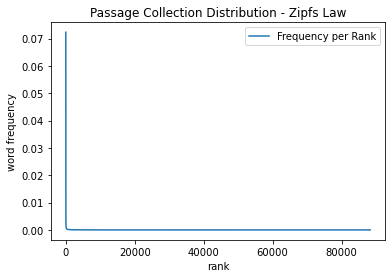

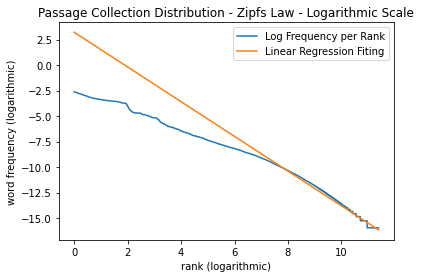

Mean Value: 0.023625645181798004
Std: 0.02381318014273192


In [25]:
Utils.plot_word_frequencies(ordered_term_frequency_dictionary,total_words)

In [26]:
## read the data
test_queries_df = pd.read_csv(test_queries_file, sep='\t', lineterminator='\n')
candidate_passages_top1000_df = pd.read_csv(candidate_passages_top1000_file, sep='\t', lineterminator='\r')

/home/apostolos/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
## set column names
test_queries_df.columns = ['qid','query']
candidate_passages_top1000_df.columns = ['qid','pid','query','passage']

In [28]:
test_queries_df.head()

,qid,query
0,1112389,"what is the county for grand rapids, mn\r"
1,792752,what is ruclip\r
2,1119729,what do you do when you have a nosebleed from ...
3,1105095,where is sugar lake lodge located\r
4,1105103,where is steph currys home in nc\r


In [29]:
candidate_passages_top1000_df.head()

,qid,pid,query,passage
0,1128373,7130104.0,iur definition,This is the definition of RNA along with examp...
1,131843,7130104.0,definition of a sigmet,This is the definition of RNA along with examp...
2,20455,7130335.0,ar glasses definition,Best Answer: The AR designation comes from the...
3,719381,7130335.0,what is ar balance,Best Answer: The AR designation comes from the...
4,20455,7130336.0,ar glasses definition,What does AR really mean? Posted by Quality AR...


## Retrieval Models and Experiments

In [30]:
## create dictionaries with the data_given
query_dict, test_queries_dict, passages_dict, query_passage_dict = Utils.get_dictionaries(candidate_passages_top1000_df,test_queries_df)

In [31]:
## preprocess the query
preprocessed_queries_dict = Utils.preprocess_queries(test_queries_dict)

In [32]:
RetrievalMethods.Retrieval_Pipeline(preprocessed_queries_dict,passages_dict,query_passage_dict,'Lindstone',0.5)

Processing query 1112389
[(3570708.0, -11.011288364975963), (7198431.0, -11.361430614278937), (8258542.0, -11.375258450631808), (3570710.0, -11.523432596476708), (640348.0, -11.776011247302868), (7198424.0, -11.802376977532626), (7651158.0, -11.847316394316177), (8487543.0, -11.977945366685747), (7198430.0, -11.985509195430073), (1449579.0, -12.224201303493544), (5372950.0, -12.230522421271216), (5372946.0, -12.233045285055764), (8060371.0, -12.244358954445861), (1357130.0, -12.306825060180307), (7558109.0, -12.306825060180307), (1422900.0, -12.308092487345665), (8501539.0, -12.308092487345665), (8501535.0, -12.30935911183385), (8060368.0, -12.31441760330696), (2840953.0, -12.315680229611521), (8487545.0, -12.318203093396072), (8138750.0, -12.46885348988288), (902455.0, -12.547971052194494), (7198428.0, -12.54924493758788), (684766.0, -12.556871257600708), (724946.0, -12.559406915626571), (8487540.0, -12.563204385121885), (199864.0, -12.624572531610799), (3397526.0, -12.625835157915361

In [33]:
preprocessed_queries_dict.get(1112389)

['county', 'grand']

In [34]:
passages_dict.get(3570708.0)

'Where is Grand Forks County, North Dakota? Grand Forks County is a county equivalent area found in North Dakota, USA. The county government of Grand Forks is found in the county seat of Grand Forks. With a total 3,728.29 sq. km of land and water area, Grand Forks County, North Dakota is the 470th largest county equivalent area in the United States. Home to 70,138 people, Grand Forks County has a total 30285 households earning 46745 on average per year.'